In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
# Read the data from 'poly.csv' to a dataframe
df = pd.read_csv('poly.csv')
# Get the column values for x & y in numpy arrays
x = df[['x']].values
y = df['y'].values

In [3]:
# Take a quick look at the dataframe
df.head()

,x,y
0,-3.292157,-46.916988
1,0.799528,-3.941553
2,-0.936214,-2.800522
3,-4.722680,-103.030914
4,-3.602674,-54.020819


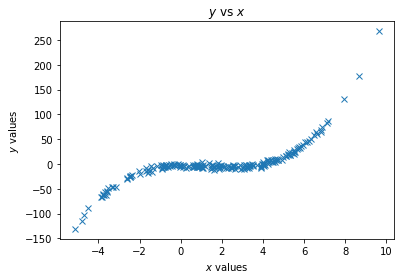

In [4]:
# Plot x & y to visually inspect the data

fig, ax = plt.subplots()
ax.plot(x,y,'x')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.set_title('$y$ vs $x$');

In [5]:
# Fit a linear model on the data
model = LinearRegression()
model.fit(x,y)

# Get the predictions on the entire data using the .predict() function
y_lin_pred = model.predict(x)

In [6]:
### edTest(test_deg) ###
# Now, we try polynomial regression
# GUESS the correct polynomial degree based on the above graph

guess_degree = 3

# Generate polynomial features on the entire data
x_poly= PolynomialFeatures(degree=guess_degree).fit_transform(x)


In [7]:
#Fit a polynomial model on the data, using x_poly as features
polymodel = LinearRegression()
polymodel.fit(x_poly,y)

y_poly_pred = polymodel.predict(x_poly)

In [8]:
# To visualise the results, sort the x values using the helper code below
# Worth examining and understand the code 

idx = np.argsort(x[:,0])
x = x[idx]

# Use the above index to get the appropriate predicted values for y
# y values corresponding to sorted x
y = y[idx]

#Linear predicted values  
y_lin_pred = y_lin_pred[idx]

#Non-linear predicted values
y_poly_pred= y_poly_pred[idx]

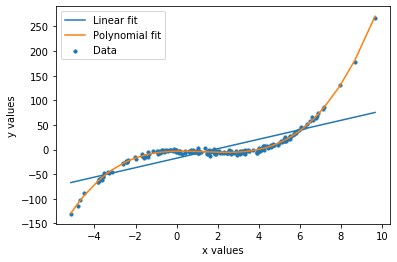

In [15]:
# First plot x & y values using plt.scatter
plt.scatter(x, y, s=10, label="Data")

# Now, plot the linear regression fit curve
plt.plot(x,y_lin_pred,label="Linear fit")

# Also plot the polynomial regression fit curve
plt.plot(x, y_poly_pred, label="Polynomial fit")

#Assigning labels to the axes
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.show()

In [10]:
### edTest(test_poly_predictions) ###
#Calculate the residual values for the polynomial model
poly_residuals = y-y_poly_pred


In [11]:
### edTest(test_linear_predictions) ###
#Calculate the residual values for the linear model
lin_residuals = y-y_lin_pred

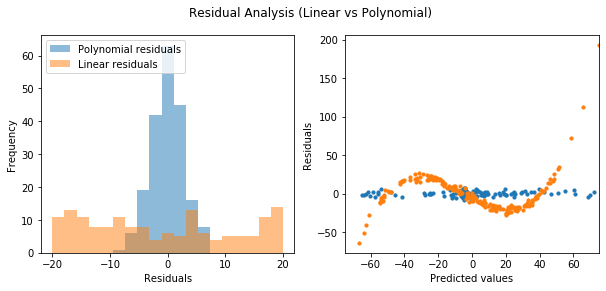

In [12]:
#Use the below helper code to plot residual values
#Plot the histograms of the residuals for the two cases

#Distribution of residuals
fig, ax = plt.subplots(1,2, figsize = (10,4))
bins = np.linspace(-20,20,20)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

#Plot the histograms for the polynomial regression
ax[0].hist(poly_residuals, bins,label = 'Polynomial residuals',alpha=0.5)

#Plot the histograms for the linear regression
ax[0].hist(lin_residuals, bins, label = 'Linear residuals',alpha=0.5)

ax[0].legend(loc = 'upper left')

# Distribution of predicted values with the residuals
ax[1].scatter(y_poly_pred, poly_residuals, s=10)
ax[1].scatter(y_lin_pred, lin_residuals, s = 10 )
ax[1].set_xlim(-75,75)
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')

fig.suptitle('Residual Analysis (Linear vs Polynomial)');

## Question: 
Do you think that polynomial degree is appropriate. Experiment with a degree of polynomial =2 and comment on what you observe for the residuals.